# Adjusted SIR model lab

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize
import numpy.linalg as la

a = Simeoni Tumor Growth Model (3 periphery compartments)
b = Volume over Time
c = Tumor Growth Model w/o Treatment (3 periphery compartments)
d = Volume over Time w/o Treatment
Parameters: lambda0=0.02, lambda1=0.001, psi=-2, k1=0.001, k2=0.001, V0=1


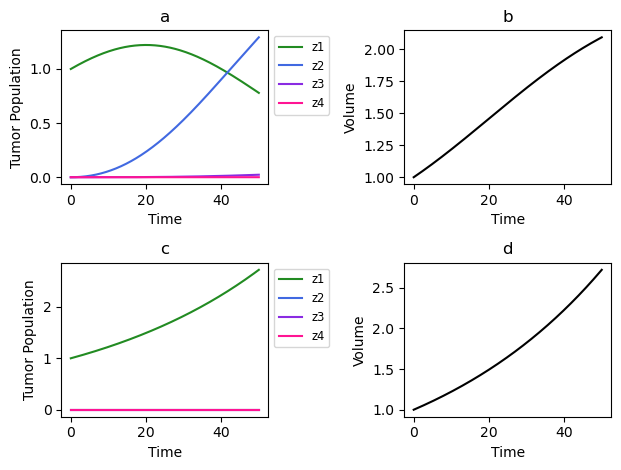

In [7]:
def simeoni_3(lambda0=.5, lambda1=.2, psi=.5, k1 = .4, k2=.5, c=lambda t: t*k1, V0 = 3, show_volume=True, show_growth=True, show_base=True):
    '''
    Adjusting the the SIR model, model the spread cancer in a body
    it plots the results of cancer cells over time

    Parameters:
    Tumor growth function values:
        lambda0 - default .5
        lambda1 - default .2
        psi - default .5

    c(t) denotes the concentration of a chemotherapeutic or immunotherapeutic agent
    V0 - default = 3
    '''

    volume = []
    no_chemo_volume = []
    
    # the simeoni model - ode system
    def ode(t, Y):

        Z1 = Y[0]
        Z2 = Y[1]
        Z3 = Y[2]
        Z4 = Y[3]

        V_t = Z1 + Z2 + Z3 + Z4
        volume.append(V_t)

        def TGF(t):
            return ((lambda0 * Y[0]) /(1+(lambda0 * V_t /lambda1)**psi)**(1/psi))

        dZ1 = TGF(t) - k1*c(t)*Z1
        dZ2 = k1*c(t)*Z1 - k2*Z2
        dZ3 = k2*Z2 - k2*Z3
        dZ4 = k2*Z3 -k2*Z4

        return np.array([dZ1, dZ2, dZ3, dZ4])#, V_t

    # Time domain
    t0 = 0
    tf = 50
    t = np.linspace(t0,tf,300)

    # total cells and inital conditions
    #initial cancer level = Y0
    Y0 = np.array([V0,0,0,0])


    # solve it
    sol = solve_ivp(ode, (t0,tf), Y0, t_eval=t).y

    fig, axs = plt.subplots(2, 2)

    if show_growth:
      # create colors for the graph
      plot_colors = ['forestgreen', 'royalblue', 'blueviolet', 'deeppink']

      line1, = axs[0, 0].plot(t,sol[0], label='z1 compartment', c=plot_colors[0])
      line2, = axs[0, 0].plot(t,sol[1], label='z2 compartment', c=plot_colors[1])
      line3, = axs[0, 0].plot(t,sol[2], label='z3 compartment', c=plot_colors[2])
      line4, = axs[0, 0].plot(t,sol[3], label='z4 compartment', c=plot_colors[3])
 
      axs[0, 0].set_title('a')

      axs[0, 0].set_xlabel('Time')
      axs[0, 0].set_ylabel('Tumor Population')

      legend = axs[0, 0].legend(handles=[line1, line2, line3, line4], labels=['z1', 'z2', 'z3', 'z4'], loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
        
      print('a = Simeoni Tumor Growth Model (3 periphery compartments)')

    if show_volume:
      axs[0, 1].plot(t, sol[0] + sol[1] + sol[2] + sol[3], c='k')
      axs[0, 1].set_title('b')
      axs[0, 0].set_xlabel('Time')
      axs[0, 0].set_ylabel('Tumor Population')
      axs[0, 1].set_xlabel("Time")
      axs[0, 1].set_ylabel("Volume")

      print('b = Volume over Time')
        
    # no chemo
    def base_ode(t, Y):

      Z1 = Y[0]
      Z2 = Y[1]
      Z3 = Y[2]
      Z4 = Y[3]

      V_t = Z1 + Z2 + Z3 + Z4
      no_chemo_volume.append(V_t)

      def TGF(t):
          return ((lambda0 * Y[0]) /(1+(lambda0 * V_t /lambda1)**psi)**(1/psi))

      dZ1 = TGF(t) 
      dZ2 = -k2*Z2 
      dZ3 = k2*Z2 - k2*Z3
      dZ4 = k2*Z3 -k2*Z4

      return np.array([dZ1, dZ2, dZ3, dZ4])#, V_t

    base_sol = solve_ivp(base_ode, (t0,tf), Y0, t_eval=t).y

    if show_base: # no chemo
      bline1, = axs[1, 0].plot(t,base_sol[0], label='z1 compartment', c=plot_colors[0])
      bline2, = axs[1, 0].plot(t,base_sol[1], label='z2 compartment', c=plot_colors[1])
      bline3, = axs[1, 0].plot(t,base_sol[2], label='z3 compartment', c=plot_colors[2])
      bline4, = axs[1, 0].plot(t,base_sol[3], label='z4 compartment', c=plot_colors[3])
      axs[1, 0].set_title('c')
      axs[1, 0].set_xlabel('Time')
      axs[1, 0].set_ylabel('Tumor Population')

      legend1 = axs[1, 0].legend(handles=[bline1, bline2, bline3, bline4], labels=['z1', 'z2', 'z3', 'z4'], loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')


      axs[1, 1].plot(t, base_sol[0] + base_sol[1] + base_sol[2] + base_sol[3], c='k')
      axs[1, 1].set_title('d')
      axs[1, 1].set_xlabel('Time')
      axs[1, 1].set_ylabel('Volume')

      print('c = Tumor Growth Model w/o Treatment (3 periphery compartments)')
      print('d = Volume over Time w/o Treatment')

    print('Parameters: lambda0=' + str(lambda0) + ', lambda1=' + str(lambda1) + ', psi=' + str(psi) + 
          ', k1=' + str(k1) + ', k2=' + str(k2) + ', V0=1')
    plt.tight_layout()
    plt.show()

# chosen constants 
lambda0 = .5
lambda1=.2
psi = .5
k1 = .4
k2=.5
V0 = 3

def c(t):
    """induces a fraction of tumor cells to commit
        to cell death with a killing constant k1"""
    return t


simeoni_3(lambda0=.02, lambda1=.001, psi=-2, k1=.001, k2=.001, c=c, V0 = 1)


Then after creating the simeoni_3 function, we tested with random parameters to try to find the best model. We did that with the following code, which we commented out after our analysis.

In [9]:
#plot a bunch and see what happens
#all constants are the same and are less than 1
# for i in range(1, 10):
    # print("consts =", i/10)
    # simeoni_3(lambda0=i/10, lambda1=i/10, psi=i/10, k1 = i/10, k2=i/10, V0 = 100)

In [10]:
#plot a bunch and see what happens
#all constants are the same and are less than 1
# for i in range(1, 10):
#     lambda0 = np.random.rand()
#     lambda1 = np.random.rand()
#     psi = np.random.rand()
#     k1 = np.random.rand()
#     k2 = np.random.rand()
#     print(lambda0, lambda1, psi, k1, k2)
#     simeoni_3(lambda0=lambda0, lambda1=lambda1, psi=psi, k1 =k1, k2=k2, V0 = 100)

After looking at each graph, we picked the best parameters and slightly modified the simeoni_3() function below:

/var/folders/6f/tvgwmzxn47d92btq5ry1q_b40000gn/T/ipykernel_3239/642102557.py:34: RuntimeWarning: invalid value encountered in double_scalars
  return ((lambda0 * Y[0]) /(1+(lambda0 * V_t /lambda1)**psi)**(1/psi))


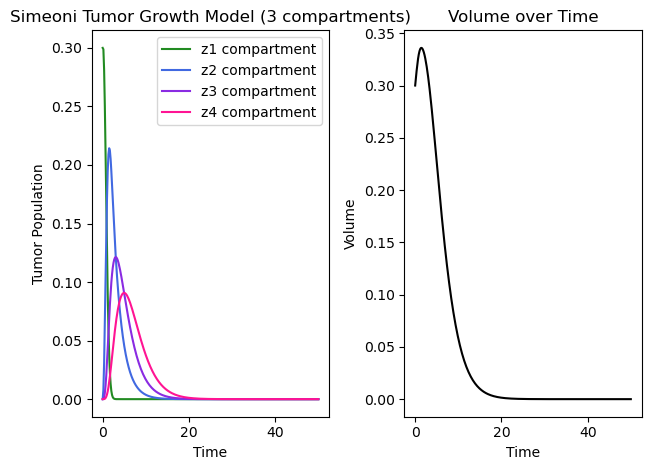

In [12]:
# Our modified model
# we have lambdas and phis changing above
# we can change c(t) = concentration in Z1 compartment at time t
# we can also show effects of chemo from being introduced when initial Z1 is very low  vs very high
# done -> also do a base non-chemo tumor growth model
def simeoni_modified(lambda0=.5, lambda1=.2, psi=.5, k1 = .4, k2=.5, c=lambda t: t*k1, V0 = 3, show_volume=True, show_growth=True):
    '''
    Adjusting the Simeoni model, model the spread cancer in a body
    it plots the results of cancer cells over time

    Parameters:
    Tumor growth function values:
        lambda0 - default .5
        lambda1 - default .2
        psi - default .5

    c(t) denotes the concentration of a chemotherapeutic or immunotherapeutic agent
    V0 - default = 3
    '''

    volume = []
    
    #simeoni model - ode system
    def ode(t, Y):

        Z1 = Y[0]
        Z2 = Y[1]
        Z3 = Y[2]
        Z4 = Y[3]

        V_t = Z1 + Z2 + Z3 + Z4
        volume.append(V_t)

        def TGF(t):
            return ((lambda0 * Y[0]) /(1+(lambda0 * V_t /lambda1)**psi)**(1/psi))

        dZ1 = TGF(t) - k1*c(t)*Z1
        dZ2 = k1*c(t)*Z1 - k2*Z2
        dZ3 = k2*Z2 - k2*Z3
        dZ4 = k2*Z3 -k2*Z4

        return np.array([dZ1, dZ2, dZ3, dZ4])#, V_t

    # Time domain
    t0 = 0
    tf = 50
    t = np.linspace(t0,tf,300)

    # total cells and inital conditions
    #initial cancer level = Y0
    Y0 = np.array([V0,0,0,0])


    # solve it
    sol = solve_ivp(ode, (t0,tf), Y0, t_eval=t).y

    if show_growth:
      # create colors for the graph
      plot_colors = ['forestgreen', 'royalblue', 'blueviolet', 'deeppink']

      plt.subplot(1, 2, 1)
      plt.plot(t,sol[0], label='z1 compartment', c=plot_colors[0])
      plt.plot(t,sol[1], label='z2 compartment', c=plot_colors[1])
      plt.plot(t,sol[2], label='z3 compartment', c=plot_colors[2])
      plt.plot(t,sol[3], label='z4 compartment', c=plot_colors[3])

      plt.xlabel('Time')
      plt.ylabel('Tumor Population')
      plt.title("Simeoni Tumor Growth Model (3 compartments)")
      plt.legend()
      plt.tight_layout()

    if show_volume:
      plt.subplot(1, 2, 2)
      plt.plot(t, sol[0] + sol[1] + sol[2] + sol[3], c='k')
      plt.title('Volume over Time')
      plt.xlabel('Time')
      plt.ylabel('Volume')
      plt.tight_layout()
      plt.show()

# good constants
lambda0 = .5
lambda1=.2
psi = .5
k1 = .4
k2=.5
V0 = 3

def c(t):
    """induces a fraction of tumor cells to commit
        to cell death with a killing constant k1"""
    return 5*t

simeoni_modified(lambda0=.5, lambda1=.2, psi=.5, k1 =.4, k2=.5, c=c, V0 =.3)

As time goes on the higher the consts the less cancer there is. We need to look at the different constants though to figure out what affects it the most.

**Stability**

In [13]:
# to find the equilibria, we want to find the Z1-Z4 where each dZ = 0
lambda0=.5
lambda1=.2
psi=.5
k1 = .4
k2=.5
c=.5
V0 = 3

# define our Z matrix
# each row represents dZi, and each column represents Zi
Z_matrix = np.array([[(lambda0)/(1+(lambda0/lambda1)**psi)**(1/psi) - k1*c, 0, 0, 0],
                     [k1*c, -k2, 0, 0],
                     [0, k2, -k2, 0],
                     [0, 0, k2, -k2]])

# now solve for zeros
b = np.zeros(4)
Z_vals = la.solve(Z_matrix, b)
print(Z_vals)

print((lambda0)/(1+(lambda0/lambda1)**psi)**(1/psi))

# now solve for the eigenvalues of Z_matrix
eigenvals = np.linalg.eigvals(Z_matrix)
print(eigenvals)


[ 0.  0.  0. -0.]
0.07504940885147124
[-0.5        -0.5        -0.5        -0.12495059]


Now we know for sure that the only equilibrium is when each Z is equal to 0